In [4]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
dir_path='..PATH...' #path to original labels
patients = os.listdir(dir_path)

In [44]:
dic_patient={}
for s in patients:
    label_dir=dir_path+s+'/labels/'
    image_name=label_dir+os.listdir(label_dir)[0]
    image=nib.load(image_name)
    """print(str(image.header.get('quatern_b').item(0))+'  '+
                    str(image.header.get('quatern_c').item(0))+'  '+str(image.header.get('quatern_d').item(0)))"""
    dic_patient[s]=[image.header.get('quatern_b').item(0),
                    image.header.get('quatern_c').item(0),
                    image.header.get('quatern_d').item(0)]


In [45]:
dic_patient['patient001']


[0.0, 1.0, 0.0]

In [46]:
df=pd.concat({k: pd.Series(v) for k, v in dic_patient.items()}, axis=1)

In [47]:
tdf=df.transpose()

In [48]:
tdf.columns=['quatern_b','quatern_c','quatern_d']

In [42]:
tdf

,quatern_b,quatern_c,quatern_d
patient001,0.0,1.0,0.0
patient002,0.0,1.0,0.0
patient003,0.0,1.0,0.0
patient004,0.0,1.0,0.0
patient005,0.0,1.0,0.0
patient006,0.0,1.0,0.0
patient007,0.0,1.0,0.0
patient008,0.0,1.0,0.0
patient009,0.0,0.0,1.0
patient010,0.0,0.0,1.0


In [49]:
tdf['quatern_a'] = tdf.apply(lambda row: 1-(row.quatern_b + row.quatern_c +row.quatern_d) , axis=1)

In [51]:
tdf['p']=tdf.apply(lambda row: row.quatern_a*row.quatern_a + 
                   row.quatern_b*row.quatern_b -
                   row.quatern_c*row.quatern_c-
                   row.quatern_d*row.quatern_d , axis=1)
tdf['q']=tdf.apply(lambda row: row.quatern_a*row.quatern_a + 
                   row.quatern_c*row.quatern_c -
                   row.quatern_b*row.quatern_b-
                   row.quatern_d*row.quatern_d , axis=1)
tdf['r']=tdf.apply(lambda row: row.quatern_a*row.quatern_a + 
                   row.quatern_d*row.quatern_d -
                   row.quatern_c*row.quatern_c-
                   row.quatern_b*row.quatern_b , axis=1)

In [52]:
tdf

,quatern_b,quatern_c,quatern_d,quatern_a,p,q,r
patient001,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient002,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient003,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient004,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient005,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient006,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient007,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient008,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0
patient009,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0
patient010,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0


In [58]:
tdf[tdf['quatern_d']>0].count()

quatern_b    65
quatern_c    65
quatern_d    65
quatern_a    65
p            65
q            65
r            65
dtype: int64

In [59]:
tdf[tdf['quatern_c']>0].count()

quatern_b    35
quatern_c    35
quatern_d    35
quatern_a    35
p            35
q            35
r            35
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000085C12B0>]], dtype=object)

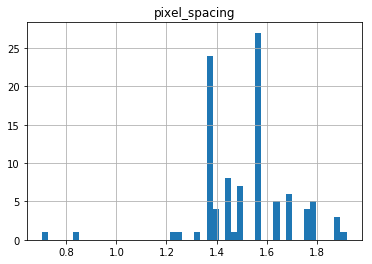

In [40]:
df.hist(column='pixel_spacing',bins=50)

In [43]:
df.groupby(['pixel_spacing']).size()

pixel_spacing
0.703125     1
0.833333     1
1.215280     1
1.250000     1
1.315790     1
1.367188    14
1.367190    10
1.406250     4
1.445310     5
1.445312     3
1.458330     1
1.484375     1
1.484380     6
1.562500    27
1.640620     2
1.640625     1
1.651790     2
1.679688     1
1.679690     2
1.682690     3
1.757810     2
1.757812     2
1.785710     5
1.875000     3
1.919640     1
dtype: int64

In [ ]:
#should be already in the code
def Orientation_flip180 (img):
        #new_img=cv2.transpose(img.pixel_array)
        #py.imshow(img_new)
        Fliped_new_img = cv2.flip(img,-1)
        return Fliped_new_img